In [8]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [9]:
g = Graph.Read_Ncol("moreno_highschool", directed = False)
with open('redes e centralidades/centralidades-moreno_highschool-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [10]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.3333333333333333, 0.31884057971014496, 0.2608695652173913, 0.2608695652173913, 0.2608695652173913, 0.2608695652173913, 0.2463768115942029, 0.2318840579710145, 0.2318840579710145, 0.21739130434782608] 

[0.2347394032365933, 0.19447551635318044, 0.14403612827581955, 0.13911633734635437, 0.11387446796940165, 0.10004963985900178, 0.09290695568430345, 0.08969902959484718, 0.08550784824210016, 0.08394424023498544] 

[0.06615657232760772, 0.06399486174491109, 0.054196037424292604, 0.05267308304841811, 0.05030967290436415, 0.047969830001272966, 0.03287476366991231, 0.024080294863631904, 0.02286456475023122, 0.021384775217623192] 

[0.4791666666666667, 0.42592592592592593, 0.39655172413793105, 0.39204545454545453, 0.3812154696132597, 0.3709677419354839, 0.3484848484848485, 0.34673366834170855, 0.33014354066985646, 0.32242990654205606] 

[0.41732771760194326, 0.3994993103456409, 0.38531967542398554, 0.3819505812721441, 0.37793001515087465, 0.3398394404461013, 0.28653076869321087, 0.1137615458

In [11]:
len(centralidade_list)

7

In [12]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(70, 7)

In [13]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9528298546
(array([0.9995283]), 1)
(array([63.48999904]), 1)


In [14]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

70

In [15]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(70, 8)

In [6]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [7]:
#  A partir daqui analise de correlacao entre as medidas

In [12]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [13]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

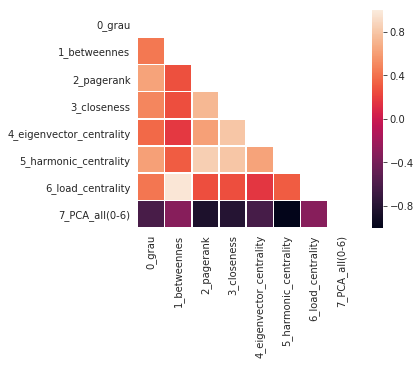

In [14]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

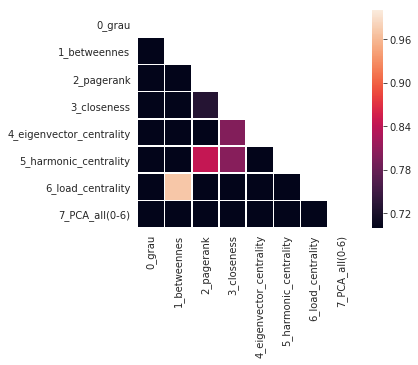

In [15]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

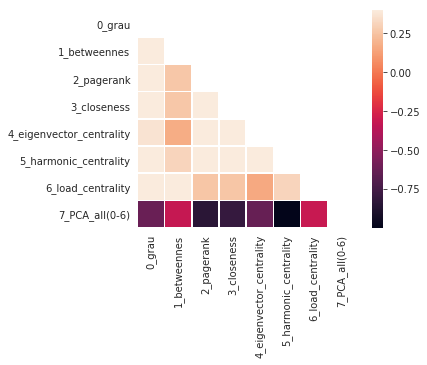

In [16]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .4,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [19]:
matrix_teste = X

In [20]:
# Alta correlacao moreno_highschool

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_2_5 = calcula_PCA(matrix_teste,2,5)
c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)


99.9523978312
99.9962325635
83.3706443896
99.9953385282


In [21]:
# Baixa correlacao moreno_highschool
c_1_2 = calcula_PCA(matrix_teste,1,2)
c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)



88.5875006484
87.5181779467
77.9176531898
99.9932380068


In [22]:
#  adicionando na matrix temporaria moreno_highschool
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste.shape



(70, 16)

In [23]:
# olhando correlacao das novas medidas da matrix teste

In [24]:
# moreno_highschool
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','25','34','35','12','13','14','15']



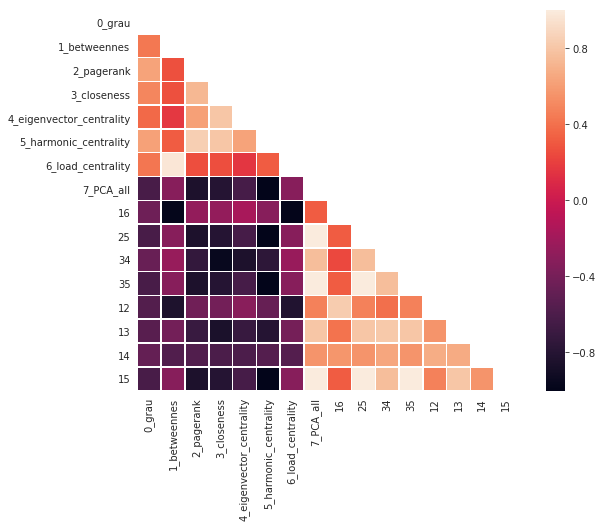

In [25]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [26]:
import pandas as pd


In [27]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [ ]:
16','25','34','35','12','13','14','15']

In [29]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],'m_25':c_2_5[0][:100],
     'm_34':c_3_4[0][:100],'m_35':c_3_5[0][:100],
     'm_12':c_1_2[0][:100],
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],'m_15':c_1_5[0][:100]}

In [30]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_12,m_13,m_14,m_15,m_1_6,m_25,m_34,m_35
0,27,36,27,27,45,27,36,46,5,5,5,46,5,46,5,46
1,45,56,45,45,66,45,56,9,46,46,46,9,68,9,46,9
2,26,14,66,36,67,36,14,7,9,9,9,7,46,7,9,7
3,6,20,67,42,44,6,20,5,7,7,7,5,9,5,7,5
4,4,26,44,44,27,42,26,47,23,2,23,47,7,47,2,47


In [33]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_2_5[0][:50],c_3_4[0][:50],c_3_5[0][:50],
     c_1_2[0][:50],c_1_3[0][:50],
     c_1_3[0][:50],c_1_5[0][:50]]
with open('sementes-moreno_highschool.txt', 'wb') as f:
    pickle.dump(s, f)